In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
# Importing necessary Python libraries

import pandas as pd       # Used to load and handle datasets (tables of data)
import numpy as np        # Used for numerical operations, like mathematical functions
import matplotlib.pyplot as plt  # Used to create graphs (line charts, scatter plots, etc.)
import seaborn as sns     # Used for creating beautiful visualizations (like heatmaps, boxplots)

from sklearn.model_selection import train_test_split   # Used to split data into training and testing parts
from sklearn.linear_model import LinearRegression      # Linear Regression → Machine Learning model we will use to predict scores
from sklearn.metrics import mean_squared_error, r2_score  # Used to measure how well our model predicts


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


This opens a file picker in Colab to upload local files from your computer.

In [ ]:
# Read the CSV file into a pandas DataFrame

df = pd.read_csv("StudentsPerformance.csv")

# Show first 5 rows of the dataset to check if it loaded correctly
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Checking the number of rows and columns in the dataset
print("Dataset Shape:", df.shape)


Dataset Shape: (1000, 8)


In [ ]:
# Get detailed information about each column (data type, number of non-null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Checking if there are any missing (null) values in the dataset
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


To check how many null/missing values exist in each column.

If all values = 0 → No missing data

In [ ]:
# Checking data types of each column
df.dtypes


,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [ ]:
# List all the column names in the dataset
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Checking unique values in categorical (non-numeric) columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}:")
    print(df[column].unique())
    print()


gender:
['female' 'male']

race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:
['standard' 'free/reduced']

test preparation course:
['none' 'completed']



In [ ]:
## Encoding Categorical Columns into Numbers
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Creating an object of LabelEncoder
le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

# Checking the dataset after encoding
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


Why encoding is needed?
Machine Learning cannot handle text directly → it needs numeric input.

Label Encoding helps convert text → numbers so algorithms can process it.



Exploratory Data Analysis (EDA)
Goal:
→ Understand the dataset by visualizing relationships between variables.
→ Find which features affect student performance (scores).
##
View correlation between numeric variables.

Visualize score distributions.

Plot relationships between features and scores.



In [ ]:
# Checking the correlation between numeric columns
df.corr()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


.corr() → calculates how strongly related the features are.

Output values range from -1 to 1:

1 → Perfect positive relationship

-1 → Perfect negative relationship

0 → No relationship



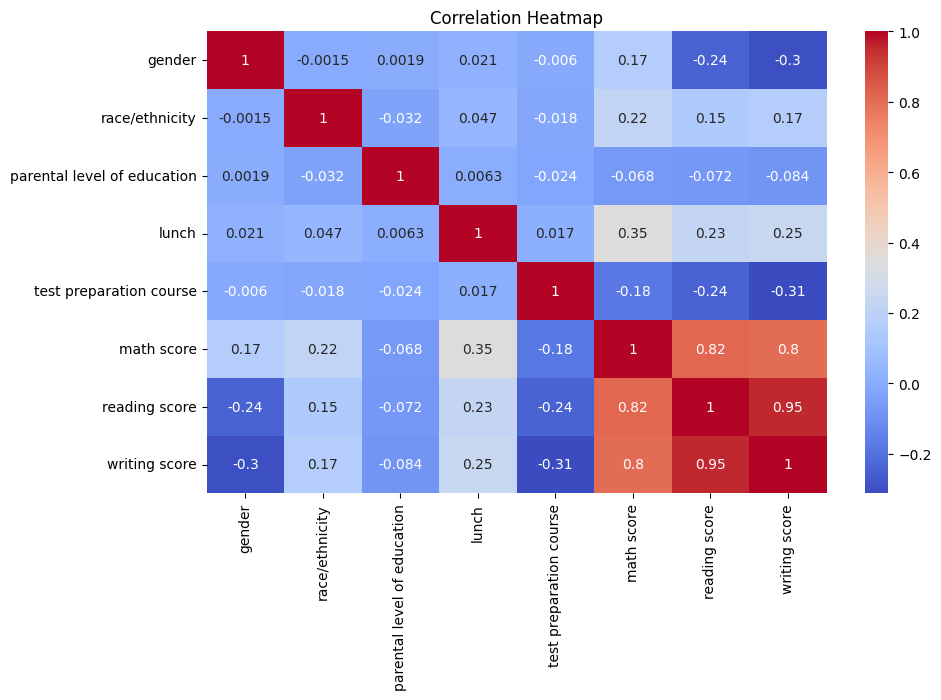

In [ ]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




## What’s being shown?
→ It’s showing correlation (relationship strength) between all numeric columns in your dataset.

## Color meaning:

# Red/Maroon (closer to +1): Strong positive relationship → as one increases, the other increases too.

# Blue (closer to -1): Strong negative relationship → as one increases, the other decreases.

# Light color or 0: No clear relationship between those two variables.

3️⃣

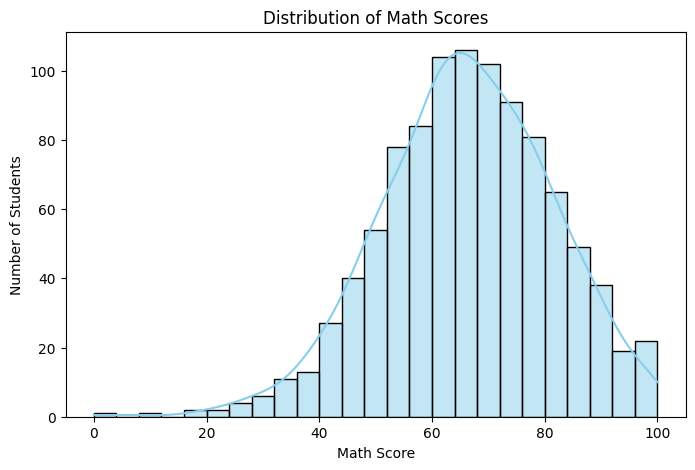

In [ ]:
# Distribution of Math Scores
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()


##Shows how student math scores are distributed → are they high, low, or balanced



## X-Axis → Math Score
Represents the actual math scores students got (from 0 to 100).

## Y-Axis → Number of Students
Represents how many students got a score in that range.

Example:
→ Around 100 students scored between 55 and 65.




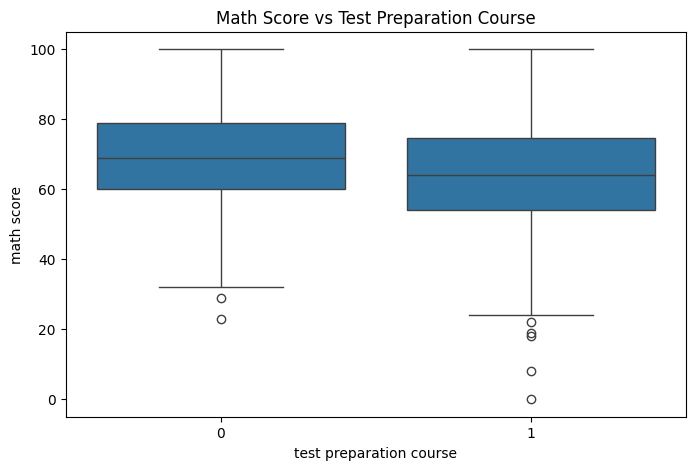

In [ ]:
#Relationship Between Study Factors and Scores
# Boxplot to see effect of test preparation on math score
plt.figure(figsize=(8,5))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score vs Test Preparation Course')
plt.show()




✅ Explanation:

Shows median, outliers, and spread of scores between those who completed vs did not complete the preparation course.

In [ ]:
# Features (independent variables)
X = df.drop('math score', axis=1)

# Target (dependent variable)
y = df['math score']


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




80% data → used to train the model.

20% data → used to test how good the model is.

random_state=42 → just makes sure you get the same split every time.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict math scores using the trained model
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R2 Score):", r2_score(y_test, y_pred))



Mean Absolute Error (MAE): 4.1301450780040545
Mean Squared Error (MSE): 28.275284506327335
Root Mean Squared Error (RMSE): 5.317450940660133
R-squared (R2 Score): 0.8838026201112223


##my output
Metric	Value	    
MAE   	4.13	→ On average, your model is off by ~4 marks when predicting.
MSE   	28.27	→ Average squared error → focuses more on larger mistakes.	✅
RMSE	 5.31	→  About 5.3 marks off on average → in terms of math score (0-100).
R²	   0.8838	→  88.4% of variation in math scores is explained by the model.
